In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [32]:
os.chdir('c:\\Users\\Utente\\Documents\\PPG-p2\\data')

In [33]:
os.getcwd()

'c:\\Users\\Utente\\Documents\\PPG-p2\\data'

In [34]:
df = pd.read_table('1-Tommaso.txt')

In [35]:
df = df.iloc[:,-3:]

In [36]:
df = df.rename(columns={'PPG_RED.' : 'Red', 'PPG_IR.': 'IR', 'PPG_GREEN.':'Green'})

In [37]:
df['tempo'] = df.index/200

In [38]:
df

,Red,IR,Green,tempo
0,3160,2627,0,0.000
1,3203,2666,0,0.005
2,3241,2718,0,0.010
3,3296,2755,0,0.015
4,3343,2809,0,0.020
...,...,...,...,...
9256,1070,893,0,46.280
9257,1065,889,0,46.285
9258,1067,910,0,46.290
9259,1069,894,0,46.295


<AxesSubplot:xlabel='tempo'>

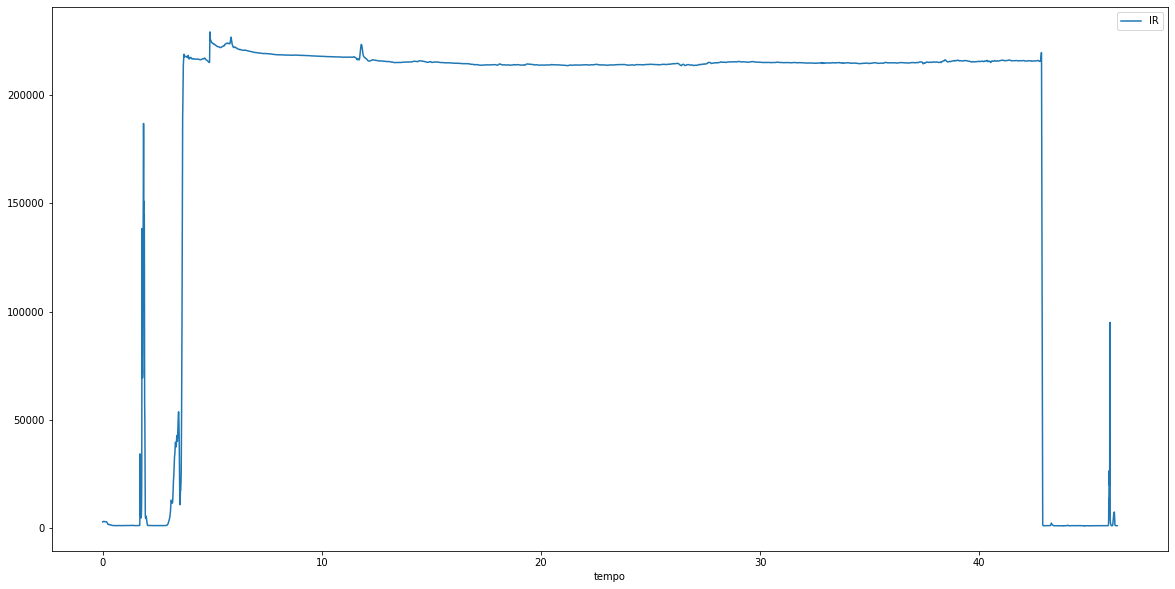

In [39]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

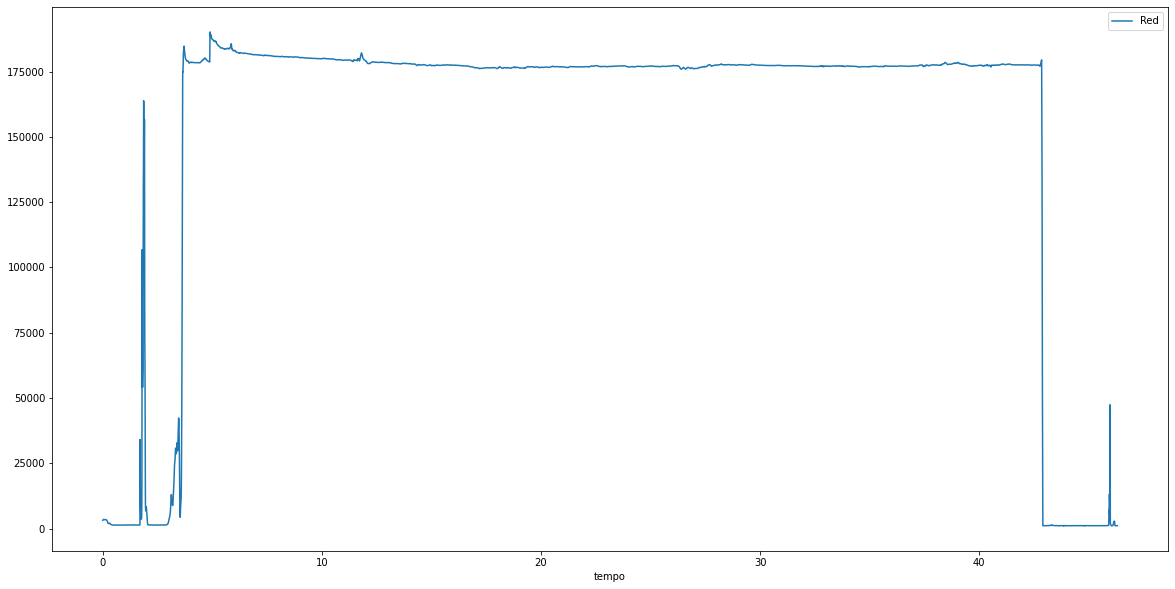

In [40]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [41]:
def taglio(df):
    print(len(df))
    for i in range(len(df)-1):
        
        if((df.at[i+1, 'tempo'] - df.at[i, 'tempo'])>0.1):
            print(df.at[i+1, 'tempo'], df.at[i, 'tempo'])
            df = df[0:i]
            break
    return df

In [42]:
df = taglio(df[df.IR> 190000].reset_index(drop=True).copy())

7841


<AxesSubplot:xlabel='tempo'>

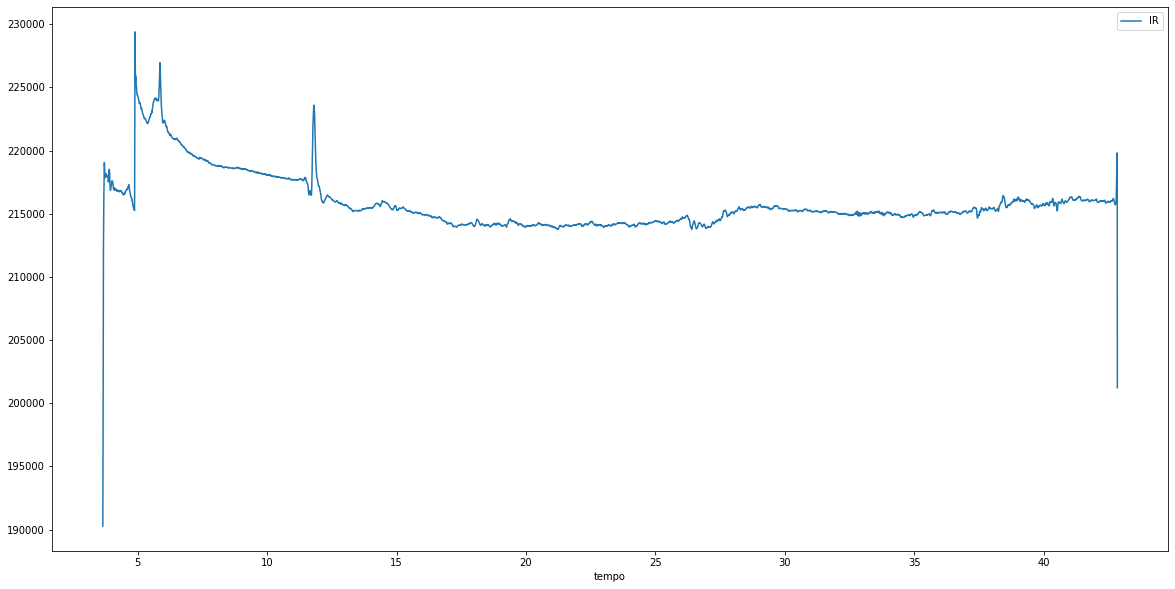

In [43]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

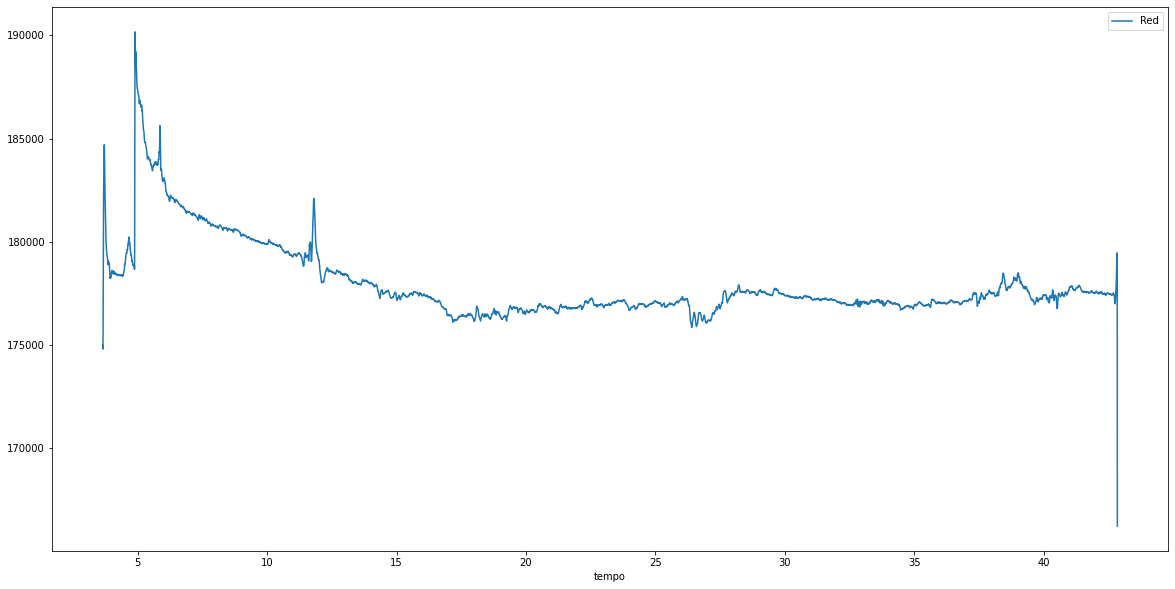

In [44]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [45]:
from scipy.signal import butter, filtfilt, find_peaks

In [46]:
def filtraggio(df, inizio, fine, tipo):
    b,a = butter(2,4,'lowpass',fs = 200)
    segnale_pulito = filtfilt(b,a, df[(df.tempo >= inizio) & (df.tempo <=fine)][tipo])
    return segnale_pulito
    

In [47]:
def graphpicchi(valori, inizio, fine, tipo):
    
    segnale_pulito = filtraggio(valori, inizio, fine, tipo)
   
    picchi = find_peaks(segnale_pulito,distance=150)[0]
    plt.figure(figsize=(20,10))
    
    
    plt.plot(np.arange(len(segnale_pulito))*1/200, segnale_pulito)
    plt.scatter([i/200 for i in picchi], [segnale_pulito[i] for i in picchi], color = 'red')
    
    print(round(200/(picchi[1:len(picchi)]- picchi[0:len(picchi)-1]).mean()*60,2), 'bpm')

46.15 bpm


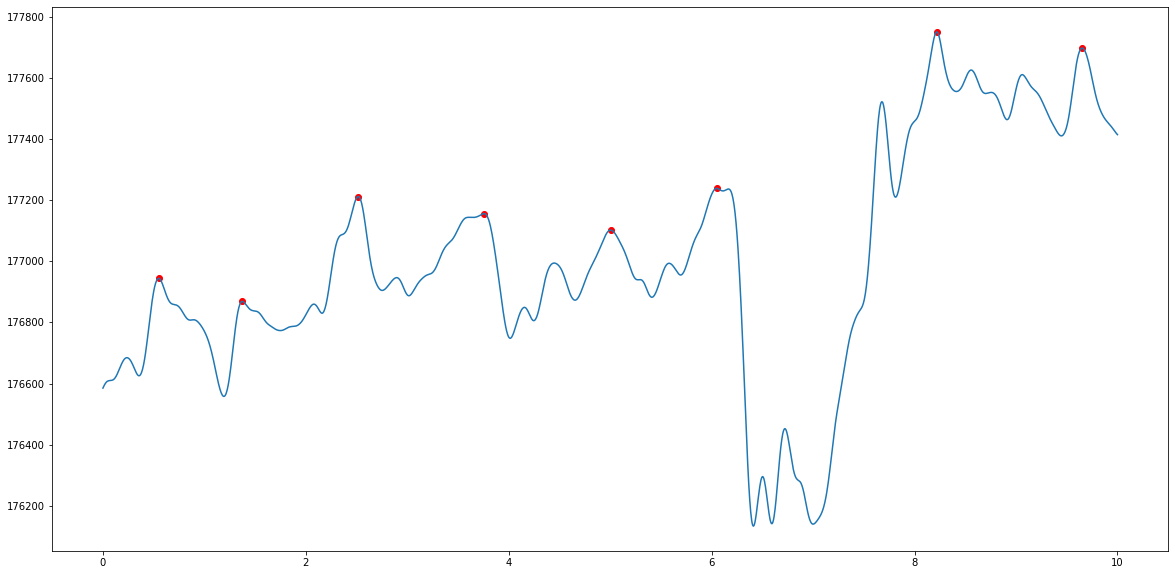

In [48]:
graphpicchi(df, 20, 30, 'Red')

49.27 bpm


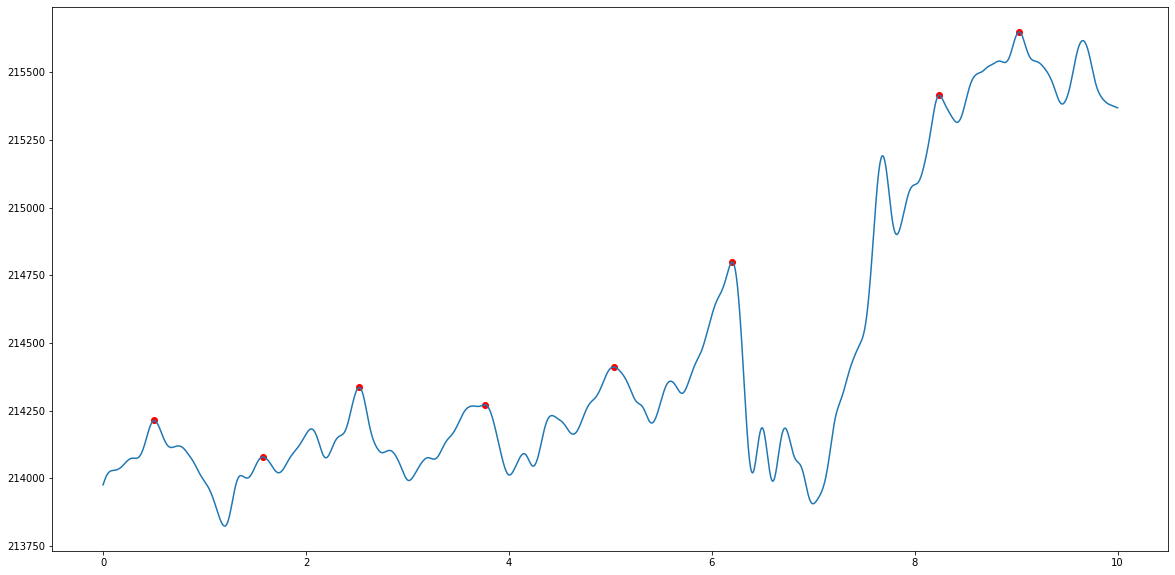

In [49]:
graphpicchi(df, 20, 30, 'IR')